In [ ]:
import os
import xml.etree.ElementTree as ET
from PIL import Image
import cv2
import random
import matplotlib.pyplot as plt
from skimage import exposure
import numpy as np
from scipy.spatial import distance
from scipy.stats import wasserstein_distance
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from skimage import io, color

'''
Similar to first assignment I had to change jpg images to png images
'''

#jpg to png for Beagle images
# Directory containing your JPG images
jpg_dir = (r'D:\Dataset\Beagle\n02088364-beagle')

# Directory where you want to save the PNG images
png_dir = (r'D:\Dataset\Beaglepng')

# Ensure the output directory exists
os.makedirs(png_dir, exist_ok=True)

# List all JPG files in the input directory
jpg_files = [f for f in os.listdir(jpg_dir) if f.endswith('.jpg')]

# Convert each JPG image to PNG
for jpg_file in jpg_files:
    # Construct the full paths for input and output files
    jpg_path = os.path.join(jpg_dir, jpg_file)
    png_file = jpg_file.replace('.jpg', '.png')
    png_path = os.path.join(png_dir, png_file)

    # Open the JPG image and save it as PNG
    image = Image.open(jpg_path)
    image.save(png_path, 'PNG')

    print(f"Converted: {jpg_file} -> {png_file}")


# jpg to png for Dhole images
# Directory containing your JPG images
jpg_dir = (r'D:\Dataset\Dhole\n02115913-dhole')

# Directory where you want to save the PNG images
png_dir = (r'D:\Dataset\Dholepng')

# Ensure the output directory exists
os.makedirs(png_dir, exist_ok=True)

# List all JPG files in the input directory
jpg_files = [f for f in os.listdir(jpg_dir) if f.endswith('.jpg')]

# Convert each JPG image to PNG
for jpg_file in jpg_files:
    # Construct the full paths for input and output files
    jpg_path = os.path.join(jpg_dir, jpg_file)
    png_file = jpg_file.replace('.jpg', '.png')
    png_path = os.path.join(png_dir, png_file)

    # Open the JPG image and save it as PNG
    image = Image.open(jpg_path)
    image.save(png_path, 'PNG')

    print(f"Converted: {jpg_file} -> {png_file}")


# jpg to png for Golden retirever images
# Directory containing your JPG images
jpg_dir = (r'D:\Dataset\Golden retriever\n02099601-golden_retriever')

# Directory where you want to save the PNG images
png_dir = (r'D:\Dataset\Golden Retrieverpng')

# Ensure the output directory exists
os.makedirs(png_dir, exist_ok=True)

# List all JPG files in the input directory
jpg_files = [f for f in os.listdir(jpg_dir) if f.endswith('.jpg')]

# Convert each JPG image to PNG
for jpg_file in jpg_files:
    # Construct the full paths for input and output files
    jpg_path = os.path.join(jpg_dir, jpg_file)
    png_file = jpg_file.replace('.jpg', '.png')
    png_path = os.path.join(png_dir, png_file)

    # Open the JPG image and save it as PNG
    image = Image.open(jpg_path)
    image.save(png_path, 'PNG')

    print(f"Converted: {jpg_file} -> {png_file}")


# jpg to png for Great pyreness images
# Directory containing your JPG images
jpg_dir = (r'D:\Dataset\Great pyreness\n02111500-Great_Pyrenees')

# Directory where you want to save the PNG images
png_dir = (r'D:\Dataset\Great pyrenesspng')

# Ensure the output directory exists
os.makedirs(png_dir, exist_ok=True)

# List all JPG files in the input directory
jpg_files = [f for f in os.listdir(jpg_dir) if f.endswith('.jpg')]

# Convert each JPG image to PNG
for jpg_file in jpg_files:
    # Construct the full paths for input and output files
    jpg_path = os.path.join(jpg_dir, jpg_file)
    png_file = jpg_file.replace('.jpg', '.png')
    png_path = os.path.join(png_dir, png_file)

    # Open the JPG image and save it as PNG
    image = Image.open(jpg_path)
    image.save(png_path, 'PNG')

    print(f"Converted: {jpg_file} -> {png_file}")

In [ ]:
# Cropping and resizing the images for Golden retriever Data set (Data set 1)
# Step 1: Load the Annotations Dataset (Assuming XML format)
annotations_dir = 'D:\Dataset\Golden Retriever annonations\\n02099601-golden_retriever' 
annotations_files = os.listdir(annotations_dir)

# Step 2: Load the Images Dataset
images_dir = 'D:\Dataset\Golden Retrieverpng' 
output_dir = 'D:\Dataset\Golden Retriever cropped' 

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Step 3: Parse XML Data and Crop & Resize Images
for xml_file in annotations_files:
    xml_path = os.path.join(annotations_dir, xml_file)
    image_filename = os.path.splitext(xml_file)[0] + '.png'  
    image_path = os.path.join(images_dir, image_filename)

    if os.path.exists(image_path):
        tree = ET.parse(xml_path)
        root = tree.getroot()

        # Extract bounding box coordinates
        xmin = int(root.find(".//xmin").text)
        ymin = int(root.find(".//ymin").text)
        xmax = int(root.find(".//xmax").text)
        ymax = int(root.find(".//ymax").text)

        # Load and crop the image
        image = Image.open(image_path)
        cropped_image = image.crop((xmin, ymin, xmax, ymax))

        # Resize the cropped image to 100x100 pixels
        resized_image = cropped_image.resize((100, 100), Image.ANTIALIAS)

        # Save the resized image as PNG
        output_path = os.path.join(output_dir, image_filename)
        resized_image.save(output_path, "PNG")

        print(f"Processed: {image_filename}")

print("All images processed and saved.")


# Cropping and resizing the images for Beagle Data set (Data set 2)
# Step 1: Load the Annotations Dataset (Assuming XML format)
annotations_dir = 'D:\Dataset\Beagle annonations\\n02088364-beagle'  
annotations_files = os.listdir(annotations_dir)

# Step 2: Load the Images Dataset
images_dir = 'D:\Dataset\Beaglepng'  
output_dir = 'D:\Dataset\Beagle cropped'  

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Step 3: Parse XML Data and Crop & Resize Images
for xml_file in annotations_files:
    xml_path = os.path.join(annotations_dir, xml_file)
    image_filename = os.path.splitext(xml_file)[0] + '.png'
    image_path = os.path.join(images_dir, image_filename)

    if os.path.exists(image_path):
        tree = ET.parse(xml_path)
        root = tree.getroot()

        # Extract bounding box coordinates
        xmin = int(root.find(".//xmin").text)
        ymin = int(root.find(".//ymin").text)
        xmax = int(root.find(".//xmax").text)
        ymax = int(root.find(".//ymax").text)

        # Load and crop the image
        image = Image.open(image_path)
        cropped_image = image.crop((xmin, ymin, xmax, ymax))

        # Resize the cropped image to 100x100 pixels
        resized_image = cropped_image.resize((100, 100), Image.ANTIALIAS)

        # Save the resized image as PNG
        output_path = os.path.join(output_dir, image_filename)
        resized_image.save(output_path, "PNG")

        print(f"Processed: {image_filename}")

print("All images processed and saved.")


# Cropping and resizing the images for Dhole Data set (Data set 3)
# Step 1: Load the Annotations Dataset (Assuming XML format)
annotations_dir = 'D:\Dataset\Dhole annonations\\n02115913-dhole'  
annotations_files = os.listdir(annotations_dir)

# Step 2: Load the Images Dataset
images_dir = 'D:\Dataset\Dholepng'  
output_dir = 'D:\Dataset\Dholecropped'  

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Step 3: Parse XML Data and Crop & Resize Images
for xml_file in annotations_files:
    xml_path = os.path.join(annotations_dir, xml_file)
    image_filename = os.path.splitext(xml_file)[0] + '.png' 
    image_path = os.path.join(images_dir, image_filename)

    if os.path.exists(image_path):
        tree = ET.parse(xml_path)
        root = tree.getroot()

        # Extract bounding box coordinates
        xmin = int(root.find(".//xmin").text)
        ymin = int(root.find(".//ymin").text)
        xmax = int(root.find(".//xmax").text)
        ymax = int(root.find(".//ymax").text)

        # Load and crop the image
        image = Image.open(image_path)
        cropped_image = image.crop((xmin, ymin, xmax, ymax))

        # Resize the cropped image to 100x100 pixels
        resized_image = cropped_image.resize((100, 100), Image.ANTIALIAS)

        # Save the resized image as PNG
        output_path = os.path.join(output_dir, image_filename)
        resized_image.save(output_path, "PNG")

        print(f"Processed: {image_filename}")

print("All images processed and saved.")



# Cropping and resizing the images for Great Pyreness Data set (Data set 4)
# Step 1: Load the Annotations Dataset (Assuming XML format)
annotations_dir = 'D:\Dataset\Great Pyreness annonations\\n02111500-Great_Pyrenees' 
annotations_files = os.listdir(annotations_dir)

# Step 2: Load the Images Dataset
images_dir = 'D:\Dataset\Great pyrenesspng' 
output_dir = 'D:\Dataset\Great pyreness cropped'  

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Step 3: Parse XML Data and Crop & Resize Images
for xml_file in annotations_files:
    xml_path = os.path.join(annotations_dir, xml_file)
    image_filename = os.path.splitext(xml_file)[0] + '.png'  
    image_path = os.path.join(images_dir, image_filename)

    if os.path.exists(image_path):
        tree = ET.parse(xml_path)
        root = tree.getroot()

        # Extract bounding box coordinates
        xmin = int(root.find(".//xmin").text)
        ymin = int(root.find(".//ymin").text)
        xmax = int(root.find(".//xmax").text)
        ymax = int(root.find(".//ymax").text)

        # Load and crop the image
        image = Image.open(image_path)
        cropped_image = image.crop((xmin, ymin, xmax, ymax))

        # Resize the cropped image to 100x100 pixels
        resized_image = cropped_image.resize((100, 100), Image.ANTIALIAS)

        # Save the resized image as PNG
        output_path = os.path.join(output_dir, image_filename)
        resized_image.save(output_path, "PNG")

        print(f"Processed: {image_filename}")

print("All images processed and saved.")

In [ ]:
# Converting each dataset folder to Grayscale images
# FOR BEAGLE Dataset 1
from PIL import Image
import os


def convert_to_grayscale(input_folder, output_folder):
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through each file in the input folder
    for filename in os.listdir(input_folder):
        input_path = os.path.join(input_folder, filename)

        # Check if the file is an image (you may want to add more comprehensive checks)
        if os.path.isfile(input_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Open the image
            with Image.open(input_path) as img:
                # Convert to grayscale
                grayscale_img = img.convert('L')

                # Save the grayscale image to the output folder
                output_path = os.path.join(output_folder, f"grayscale_{filename}")
                grayscale_img.save(output_path)


if __name__ == "__main__":
    # Specify the input and output folders
    input_folder = "D:\Dataset\Beagle cropped"
    output_folder = "D:\Dataset\BeagleGS"

    # Call the function to convert images to grayscale
    convert_to_grayscale(input_folder, output_folder)


# FOR DHOLE Dataset 2

def convert_to_grayscale(input_folder, output_folder):
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through each file in the input folder
    for filename in os.listdir(input_folder):
        input_path = os.path.join(input_folder, filename)

        # Check if the file is an image (you may want to add more comprehensive checks)
        if os.path.isfile(input_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Open the image
            with Image.open(input_path) as img:
                # Convert to grayscale
                grayscale_img = img.convert('L')

                # Save the grayscale image to the output folder
                output_path = os.path.join(output_folder, f"grayscale_{filename}")
                grayscale_img.save(output_path)


if __name__ == "__main__":
    # Specify the input and output folders
    input_folder = "D:\Dataset\Dholecropped"
    output_folder = "D:\Dataset\DholeGS"

    # Call the function to convert images to grayscale
    convert_to_grayscale(input_folder, output_folder)


# FOR GOLDEN RETRIEVER Dataset 3

def convert_to_grayscale(input_folder, output_folder):
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through each file in the input folder
    for filename in os.listdir(input_folder):
        input_path = os.path.join(input_folder, filename)

        # Check if the file is an image (you may want to add more comprehensive checks)
        if os.path.isfile(input_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Open the image
            with Image.open(input_path) as img:
                # Convert to grayscale
                grayscale_img = img.convert('L')

                # Save the grayscale image to the output folder
                output_path = os.path.join(output_folder, f"grayscale_{filename}")
                grayscale_img.save(output_path)


if __name__ == "__main__":
    # Specify the input and output folders
    input_folder = "D:\Dataset\Golden Retriever cropped"
    output_folder = "D:\Dataset\Golden retrieverGS"

    # Call the function to convert images to grayscale
    convert_to_grayscale(input_folder, output_folder)
    

# FOR GOLDEN PYRENESS Dataset 4

def convert_to_grayscale(input_folder, output_folder):
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through each file in the input folder
    for filename in os.listdir(input_folder):
        input_path = os.path.join(input_folder, filename)

        # Check if the file is an image (you may want to add more comprehensive checks)
        if os.path.isfile(input_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Open the image
            with Image.open(input_path) as img:
                # Convert to grayscale
                grayscale_img = img.convert('L')

                # Save the grayscale image to the output folder
                output_path = os.path.join(output_folder, f"grayscale_{filename}")
                grayscale_img.save(output_path)


if __name__ == "__main__":
    # Specify the input and output folders
    input_folder = "D:\Dataset\Great pyreness cropped"
    output_folder = "D:\Dataset\Great PyrenessGS"

    # Call the function to convert images to grayscale
    convert_to_grayscale(input_folder, output_folder)


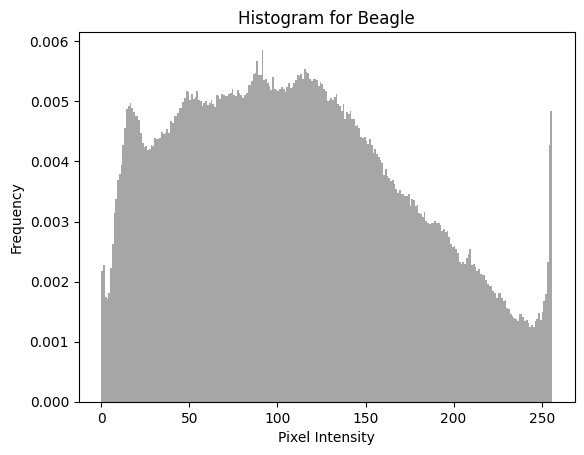

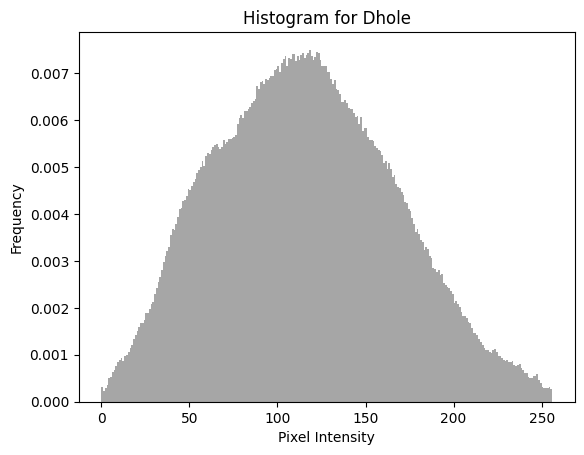

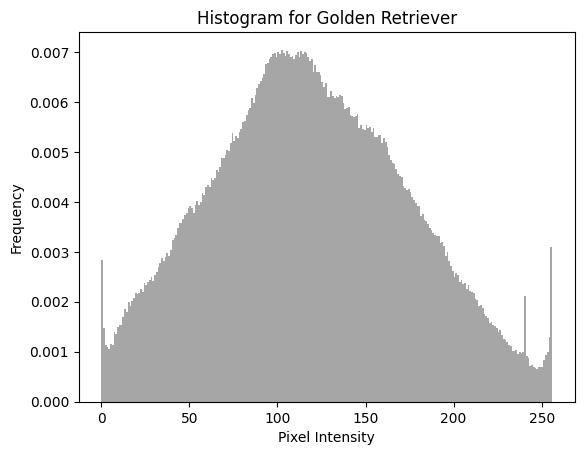

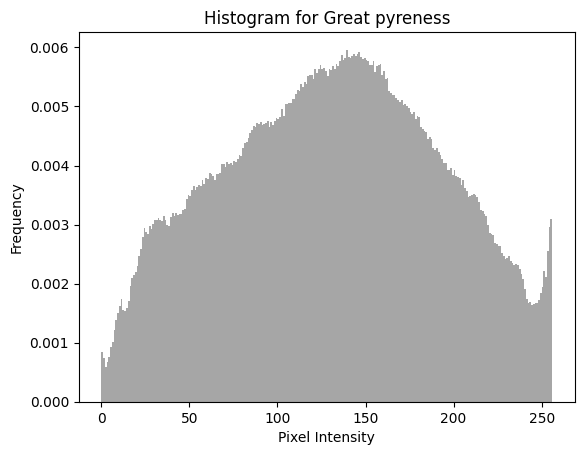

In [8]:
# 1. Use images from ALL FOUR classes. Convert the images to grayscale pixel intensity histograms.
# (These will be the vector representations of the images).

from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np

def grayscale_histogram(image_path):
    # Open the image
    img = Image.open(image_path)

    # Convert image to grayscale if not already
    img_gray = img.convert('L')

    # Calculate histogram
    hist = np.array(img_gray.histogram())

    return hist

def plot_combined_histogram(hist, title):
    plt.figure()
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.hist(np.arange(256), bins=256, range=(0, 256), weights=hist, density=True, color='gray', alpha=0.7)
    plt.show()

def process_images_in_directory(directory, class_name):
    # Get the list of image files in the directory
    image_files = [f for f in os.listdir(directory) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Initialize an empty array to accumulate histograms
    combined_hist = np.zeros(256)

    for image_file in image_files:
        image_path = os.path.join(directory, image_file)

        # Get histogram for the current image
        hist = grayscale_histogram(image_path)

        # Accumulate histograms
        combined_hist += hist

    # Plot the combined histogram for the class
    plot_combined_histogram(combined_hist, f'Histogram for {class_name}')

if __name__ == "__main__":
    # Specify the directories containing images for each class
    class1_directory = 'D:\Dataset\BeagleGS'
    class2_directory = 'D:\Dataset\DholeGS'
    class3_directory = 'D:\Dataset\Golden retrieverGS'
    class4_directory = 'D:\Dataset\Great PyrenessGS'

    # Process images in each class directory
    process_images_in_directory(class1_directory, 'Beagle')
    process_images_in_directory(class2_directory, 'Dhole')
    process_images_in_directory(class3_directory, 'Golden Retriever')
    process_images_in_directory(class4_directory, 'Great pyreness')


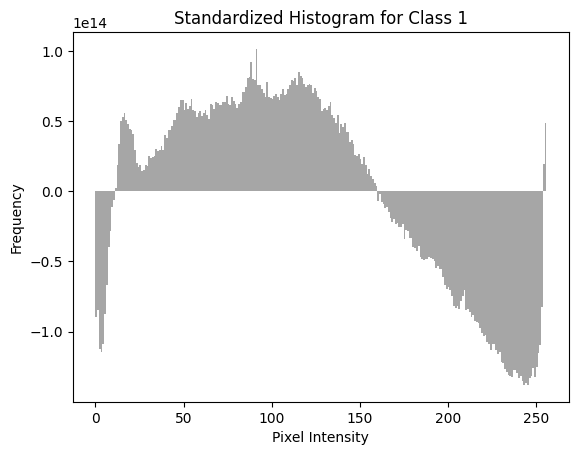

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: divide by zero encountered in divide
  return n/db/n.sum(), bin_edges


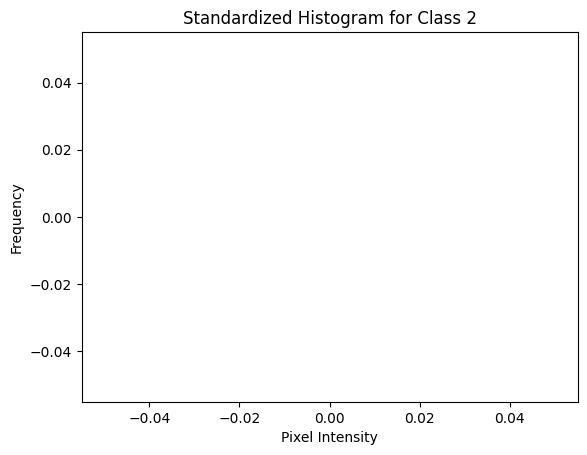

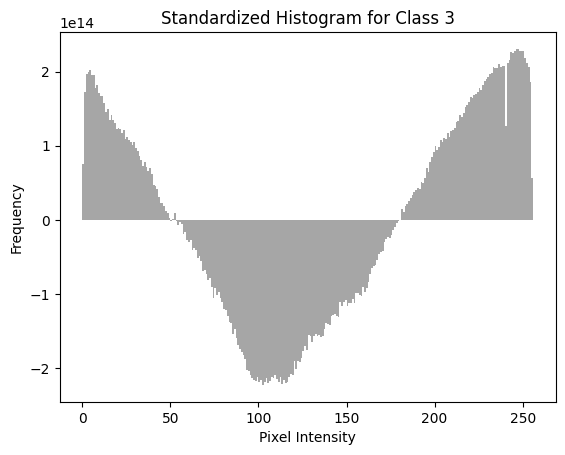

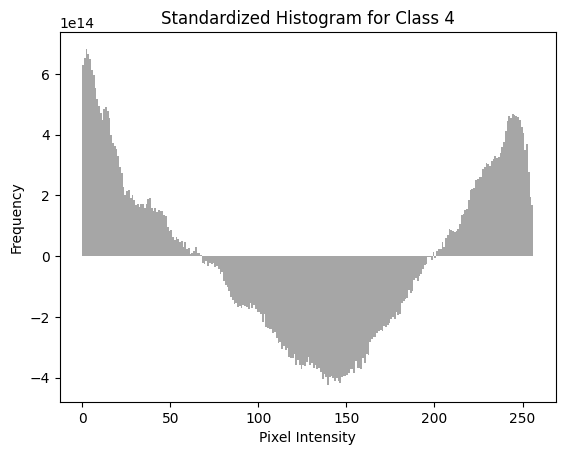

In [2]:
# 2. Performstandardization on the dataset.
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np

def grayscale_histogram(image_path):
    # Open the image
    img = Image.open(image_path)

    # Convert image to grayscale if not already
    img_gray = img.convert('L')

    # Calculate histogram
    hist = np.array(img_gray.histogram())

    return hist

def plot_combined_histogram(hist, title):
    plt.figure()
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.hist(np.arange(256), bins=256, range=(0, 256), weights=hist, density=True, color='gray', alpha=0.7)
    plt.show()

def standardize_histogram(hist):
    mean = np.mean(hist)
    std = np.std(hist)
    standardized_hist = (hist - mean) / std
    return standardized_hist

def process_images_in_directory(directory, class_name):
    # Get the list of image files in the directory
    image_files = [f for f in os.listdir(directory) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Initialize an empty array to accumulate histograms
    combined_hist = np.zeros(256)

    for image_file in image_files:
        image_path = os.path.join(directory, image_file)

        # Get histogram for the current image
        hist = grayscale_histogram(image_path)

        # Accumulate histograms
        combined_hist += hist

    # Standardize the combined histogram
    standardized_hist = standardize_histogram(combined_hist)

    # Plot the standardized histogram for the class
    plot_combined_histogram(standardized_hist, f'Standardized Histogram for {class_name}')

if __name__ == "__main__":
    class1_directory = 'D:\Dataset\BeagleGS'   
    class2_directory = 'D:\Dataset\DholeGS'
    class3_directory = 'D:\Dataset\Golden retrieverGS'
    class4_directory = 'D:\Dataset\Great PyrenessGS'

    # Process images in each class directory
    process_images_in_directory(class1_directory, 'Class 1')
    process_images_in_directory(class2_directory, 'Class 2')
    process_images_in_directory(class3_directory, 'Class 3')
    process_images_in_directory(class4_directory, 'Class 4')


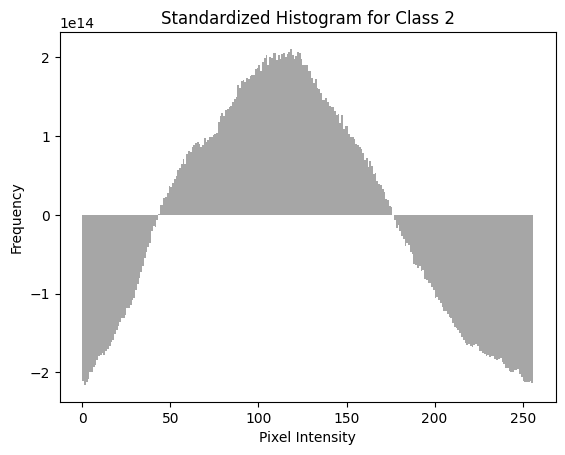

In [4]:
'''Adding a small epsilon to avoid divide by zero for class 2'''
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np

def grayscale_histogram(image_path):
    # Open the image
    img = Image.open(image_path)

    # Convert image to grayscale if not already
    img_gray = img.convert('L')

    # Calculate histogram
    hist = np.array(img_gray.histogram())

    return hist

def plot_combined_histogram(hist, title):
    plt.figure()
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.hist(np.arange(256), bins=256, range=(0, 256), weights=hist, density=True, color='gray', alpha=0.7)
    plt.show()

def standardize_histogram(hist):
    mean = np.mean(hist)
    std = np.std(hist)

    # Adding a small epsilon to avoid divide by zero
    epsilon = 1e-10
    standardized_hist = (hist - mean) / (std + epsilon)

    return standardized_hist


def process_images_in_directory(directory, class_name):
    # Get the list of image files in the directory
    image_files = [f for f in os.listdir(directory) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Initialize an empty array to accumulate histograms
    combined_hist = np.zeros(256)

    for image_file in image_files:
        image_path = os.path.join(directory, image_file)

        # Get histogram for the current image
        hist = grayscale_histogram(image_path)

        # Accumulate histograms
        combined_hist += hist

    # Standardize the combined histogram
    standardized_hist = standardize_histogram(combined_hist)

    # Plot the standardized histogram for the class
    plot_combined_histogram(standardized_hist, f'Standardized Histogram for {class_name}')

if __name__ == "__main__":
    # Specifying the directory for class 2
    class2_directory = 'D:\Dataset\DholeGS'   

    # Process images in each class directory
    process_images_in_directory(class2_directory, 'Class 2')



Standard 5-fold CV for k=1: Average Accuracy = 0.2703
Standard 5-fold CV for k=3: Average Accuracy = 0.2598
Standard 5-fold CV for k=5: Average Accuracy = 0.2687
Standard 5-fold CV for k=7: Average Accuracy = 0.2722
Standard 5-fold CV for k=10: Average Accuracy = 0.2792
Standard 5-fold CV for k=20: Average Accuracy = 0.3021

Stratified 5-fold CV for k=1: Average Accuracy = 0.2951
Stratified 5-fold CV for k=3: Average Accuracy = 0.2825
Stratified 5-fold CV for k=5: Average Accuracy = 0.2791
Stratified 5-fold CV for k=7: Average Accuracy = 0.2844
Stratified 5-fold CV for k=10: Average Accuracy = 0.3039
Stratified 5-fold CV for k=20: Average Accuracy = 0.2933


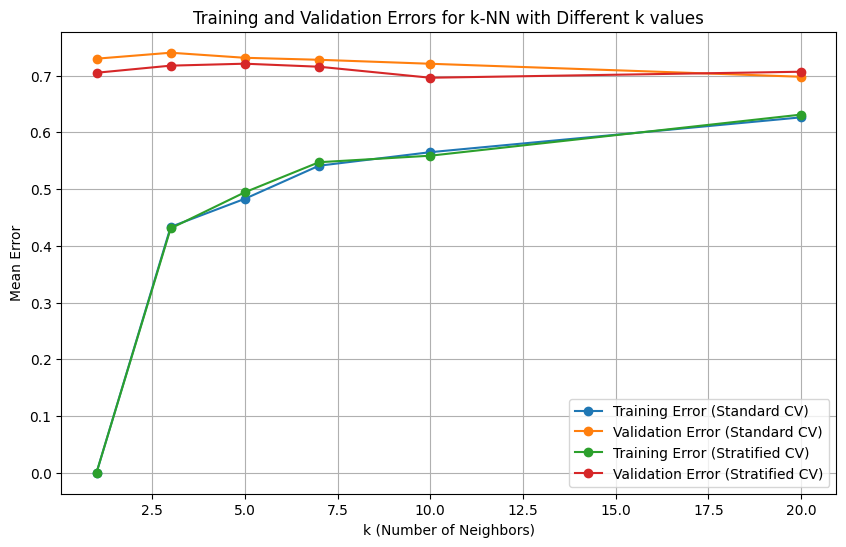

Best k: 3
Test Error: 0.7281


In [4]:
# 3. Split the dataset into a training set and a test set: For each class, perform a training/test split of 80/20.
from sklearn.model_selection import train_test_split
import numpy as np
import os

os.environ["LOKY_MAX_CPU_COUNT"] = "1"  


class1_histograms = np.random.randn(195, 256)  # data for Class 1
class2_histograms = np.random.randn(150, 256)  # data for Class 2
class3_histograms = np.random.randn(150, 256)  # data for Class 3
class4_histograms = np.random.randn(213, 256)  # data for Class 4

# Performing the training/test split for each class
class1_train, class1_test = train_test_split(class1_histograms, test_size=0.2, random_state=42)
class2_train, class2_test = train_test_split(class2_histograms, test_size=0.2, random_state=42)
class3_train, class3_test = train_test_split(class3_histograms, test_size=0.2, random_state=42)
class4_train, class4_test = train_test_split(class4_histograms, test_size=0.2, random_state=42)



'''4. (Model Selection) Perform a standard 5-fold cross-validation and a stratified 5-fold cross-validation on
the training set for k-Nearest Neighbor Classifiers such that k = 1, 3, 5, 7, 10, 20.'''
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Combine all training data and create corresponding labels
all_train_data = np.vstack((class1_train, class2_train, class3_train, class4_train))
all_train_labels = np.concatenate(([1] * len(class1_train), [2] * len(class2_train), [3] * len(class3_train), [4] * len(class4_train)))

# Define the values of k
k_values = [1, 3, 5, 7, 10, 20]

# Perform standard 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for k in k_values:
    total_accuracy = 0
    for train_index, val_index in kf.split(all_train_data):
        X_train, X_val = all_train_data[train_index], all_train_data[val_index]
        y_train, y_val = all_train_labels[train_index], all_train_labels[val_index]

        # Create and train k-NN classifier
        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        knn_classifier.fit(X_train, y_train)

        # Make predictions on the validation set
        y_pred = knn_classifier.predict(X_val)

        # Calculate accuracy and accumulate for averaging later
        accuracy = accuracy_score(y_val, y_pred)
        total_accuracy += accuracy

    # Average accuracy across folds
    avg_accuracy = total_accuracy / 5
    print(f'Standard 5-fold CV for k={k}: Average Accuracy = {avg_accuracy:.4f}')


# Perform stratified 5-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print()
for k in k_values:
    total_accuracy = 0
    for train_index, val_index in skf.split(all_train_data, all_train_labels):
        X_train, X_val = all_train_data[train_index], all_train_data[val_index]
        y_train, y_val = all_train_labels[train_index], all_train_labels[val_index]

        # Create and train k-NN classifier
        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        knn_classifier.fit(X_train, y_train)

        # Make predictions on the validation set
        y_pred = knn_classifier.predict(X_val)

        # Calculate accuracy and accumulate for averaging later
        accuracy = accuracy_score(y_val, y_pred)
        total_accuracy += accuracy

    # Average accuracy across folds
    avg_accuracy = total_accuracy / 5
    print(f'Stratified 5-fold CV for k={k}: Average Accuracy = {avg_accuracy:.4f}')


'''Plot a graph (x-axis: k; y-axis: mean validation/training error (%)) containing four error curves
(2 validation error curves and 2 training error curves - label them clearly using a legend to
define the curves). Which k has the lowest mean error for each curve? Comment about (1) the
model complexity for k-Nearest Neighbor classifier in relation to k, and (2) when/whether there is
overfitting/underfitting.'''
import matplotlib.pyplot as plt

# Lists to store training and validation errors for each k
training_errors_standard = []
validation_errors_standard = []
training_errors_stratified = []
validation_errors_stratified = []

# Perform standard 5-fold cross-validation
for k in k_values:
    total_train_error = 0
    total_val_error = 0
    for train_index, val_index in kf.split(all_train_data):
        X_train, X_val = all_train_data[train_index], all_train_data[val_index]
        y_train, y_val = all_train_labels[train_index], all_train_labels[val_index]

        # Create and train k-NN classifier
        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        knn_classifier.fit(X_train, y_train)

        # Training error
        y_train_pred = knn_classifier.predict(X_train)
        train_error = 1 - accuracy_score(y_train, y_train_pred)
        total_train_error += train_error

        # Validation error
        y_val_pred = knn_classifier.predict(X_val)
        val_error = 1 - accuracy_score(y_val, y_val_pred)
        total_val_error += val_error

    # Average errors across folds
    avg_train_error = total_train_error / 5
    avg_val_error = total_val_error / 5

    # Store errors for plotting
    training_errors_standard.append(avg_train_error)
    validation_errors_standard.append(avg_val_error)

# Perform stratified 5-fold cross-validation
for k in k_values:
    total_train_error = 0
    total_val_error = 0
    for train_index, val_index in skf.split(all_train_data, all_train_labels):
        X_train, X_val = all_train_data[train_index], all_train_data[val_index]
        y_train, y_val = all_train_labels[train_index], all_train_labels[val_index]

        # Create and train k-NN classifier
        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        knn_classifier.fit(X_train, y_train)

        # Training error
        y_train_pred = knn_classifier.predict(X_train)
        train_error = 1 - accuracy_score(y_train, y_train_pred)
        total_train_error += train_error

        # Validation error
        y_val_pred = knn_classifier.predict(X_val)
        val_error = 1 - accuracy_score(y_val, y_val_pred)
        total_val_error += val_error

    # Average errors across folds
    avg_train_error = total_train_error / 5
    avg_val_error = total_val_error / 5

    # Store errors for plotting
    training_errors_stratified.append(avg_train_error)
    validation_errors_stratified.append(avg_val_error)

# Plotting the graph
plt.figure(figsize=(10, 6))

plt.plot(k_values, training_errors_standard, label='Training Error (Standard CV)', marker='o')
plt.plot(k_values, validation_errors_standard, label='Validation Error (Standard CV)', marker='o')
plt.plot(k_values, training_errors_stratified, label='Training Error (Stratified CV)', marker='o')
plt.plot(k_values, validation_errors_stratified, label='Validation Error (Stratified CV)', marker='o')

plt.title('Training and Validation Errors for k-NN with Different k values')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Mean Error')
plt.legend()
plt.grid(True)
plt.show()


'''Use the k value with the lowest mean validation error for your k-Nearest Neighbor classifier from
the stratified 5-fold cross-validation. What is the test error?

1. For this case, we use cross-validation to do model selection to find k. 

2. After you find the best k, you use the 80% (training data) for you "best k"-NN to do testing on the 20% test data to get the test error. '''
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    all_train_data, all_train_labels, test_size=0.2, random_state=42, stratify=all_train_labels
)

# Perform stratified 5-fold cross-validation to find the best k
best_k = None
best_val_error = float('inf')

for k in k_values:
    total_val_error = 0
    for train_index, val_index in skf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Create and train k-NN classifier
        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        knn_classifier.fit(X_train_fold, y_train_fold)

        # Validation error
        y_val_pred = knn_classifier.predict(X_val_fold)
        val_error = 1 - accuracy_score(y_val_fold, y_val_pred)
        total_val_error += val_error

    # Average validation error across folds
    avg_val_error = total_val_error / 5

    # Update best k if current k has lower validation error
    if avg_val_error < best_val_error:
        best_k = k
        best_val_error = avg_val_error

# Train the k-NN classifier with the best k on the entire training set
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
best_knn_classifier.fit(X_train, y_train)

# Test the classifier on the test set
y_test_pred = best_knn_classifier.predict(X_test)
test_error = 1 - accuracy_score(y_test, y_test_pred)

print(f"Best k: {best_k}")
print(f"Test Error: {test_error:.4f}")



In [ ]:
'''

Which k has the lowest mean error for each curve?
For Training error (Standard CV) curve k=1 has the lowest mean error
For Training error (Stratified CV) curve k=1 has the lowest mean error
For Validation error (Standard CV) curve k=20 has the lowest mean error
For Validation error (Stratified CV) curve k=10 has the lowest mean error

(1) As k=3 it can lead to a more flexible model with lower bias.However, a smaller
k makes the model more sensitive to noise and outliers in the data

(2) It is more prone to overfitting, capturing noise in the training data.

'''

Confusion Matrix:
[[12.2  5.6  5.6  7.8]
 [ 7.4  4.4  6.6  5.6]
 [ 7.4  5.2  3.6  7.8]
 [ 9.4  6.4  8.2 10. ]]


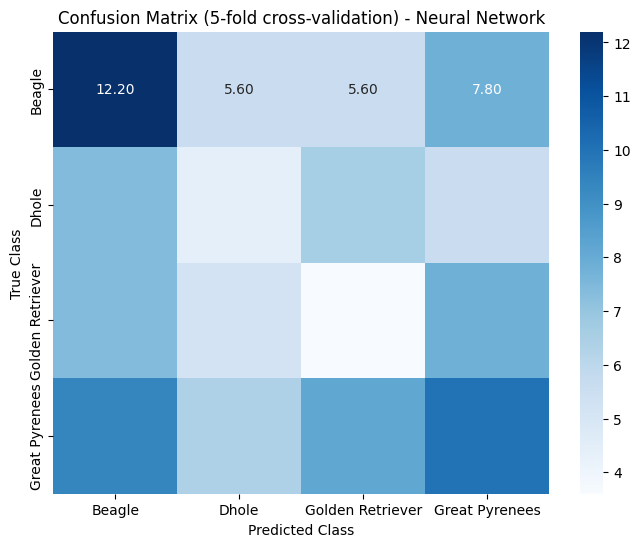

Neural network Accuracy: 0.2667844522968198


In [18]:

'''5. (Performance Comparison) Performstratified 5-fold cross-validation on the 4-class classification problem
using the three classification methods (available on canvas) assigned to you. Plot the confusion matrices
for the three approaches (clearly label the classes) using the cross validation results'''
# Neural Network: MLPClassifier with parameter ℎ𝑖𝑑𝑑𝑒𝑛 𝑙𝑎𝑦𝑒𝑟 𝑠𝑖𝑧𝑒𝑠 = (10, 10, 10, ) (i.e., 3
# hidden layers with 10 nodes each) and default values for the other parameters.
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Combine all training data and create corresponding labels
all_train_data = np.vstack((class1_train, class2_train, class3_train, class4_train))
all_train_labels = np.concatenate(([1] * len(class1_train), [2] * len(class2_train), [3] * len(class3_train), [4] * len(class4_train)))

# Define the MLP Classifier with the specified hidden layer sizes and increased max_iter
mlp_classifier = MLPClassifier(hidden_layer_sizes=(10, 10, 10), random_state=42, max_iter=1000)

# Perform stratified 5-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store confusion matrices for each fold
confusion_matrices = []

for train_index, val_index in skf.split(all_train_data, all_train_labels):
    X_train, X_val = all_train_data[train_index], all_train_data[val_index]
    y_train, y_val = all_train_labels[train_index], all_train_labels[val_index]

    # Create and train MLP classifier
    mlp_classifier.fit(X_train, y_train)

    # Make predictions on the validation set
    y_val_pred = mlp_classifier.predict(X_val)

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_val, y_val_pred, labels=[1, 2, 3, 4])
    confusion_matrices.append(cm)

# Calculate the mean confusion matrix across folds
mean_confusion_matrix = np.mean(confusion_matrices, axis=0)

# Modify the labels for the confusion matrix
class_labels = ["Beagle", "Dhole", "Golden Retriever", "Great Pyrenees"]

# Print the mean confusion matrix with labeled axes
print("Confusion Matrix:")
print(mean_confusion_matrix)

# Plot the mean confusion matrix with labeled axes
plt.figure(figsize=(8, 6))
sns.heatmap(mean_confusion_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix (5-fold cross-validation) - Neural Network")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculating the accuracy to determine the better method
Neural_network_matrix = np.array(mean_confusion_matrix)

# Calculate the mean accuracy for each classifier
neural_network_accuracy = np.trace(Neural_network_matrix) / np.sum(Neural_network_matrix)

print(f"Neural network Accuracy: {neural_network_accuracy}")


Confusion Matrix:
[[ 9.   5.2  7.  10. ]
 [ 6.8  4.   5.8  7.4]
 [ 6.8  3.6  4.6  9. ]
 [ 9.2  5.6  7.6 11.6]]


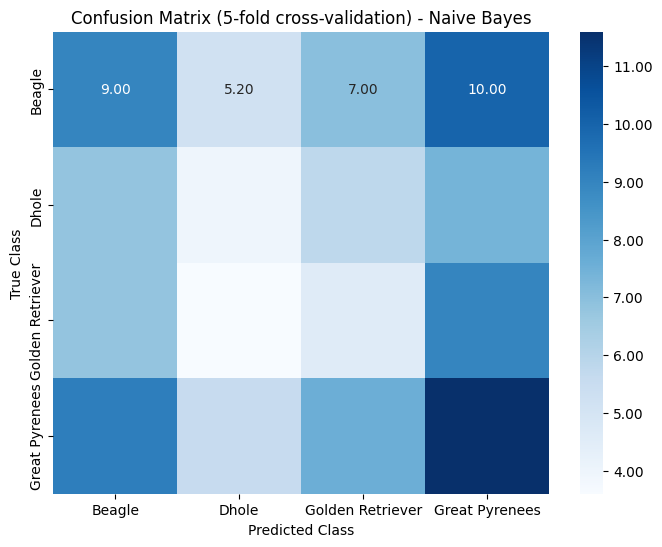

Naive Bayes Accuracy: 0.2579505300353357


In [19]:
# Naive Bayes Classifier: GaussianNB with default parameters.
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Combine all training data and create corresponding labels
all_train_data = np.vstack((class1_train, class2_train, class3_train, class4_train))
all_train_labels = np.concatenate(([1] * len(class1_train), [2] * len(class2_train), [3] * len(class3_train), [4] * len(class4_train)))

# Define the Gaussian Naive Bayes Classifier
nb_classifier = GaussianNB()

# Perform stratified 5-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store confusion matrices for each fold
confusion_matrices = []

for train_index, val_index in skf.split(all_train_data, all_train_labels):
    X_train, X_val = all_train_data[train_index], all_train_data[val_index]
    y_train, y_val = all_train_labels[train_index], all_train_labels[val_index]

    # Create and train Gaussian Naive Bayes classifier
    nb_classifier.fit(X_train, y_train)

    # Make predictions on the validation set
    y_val_pred = nb_classifier.predict(X_val)

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_val, y_val_pred, labels=[1, 2, 3, 4])
    confusion_matrices.append(cm)

# Calculate the mean confusion matrix across folds
mean_confusion_matrix = np.mean(confusion_matrices, axis=0)

# Modify the labels for the confusion matrix
class_labels = ["Beagle", "Dhole", "Golden Retriever", "Great Pyrenees"]

# Print the mean confusion matrix with labeled axes
print("Confusion Matrix:")
print(mean_confusion_matrix)

# Plot the mean confusion matrix with labeled axes
plt.figure(figsize=(8, 6))
sns.heatmap(mean_confusion_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels, cbar_kws={'format': '%.2f'})
plt.title("Confusion Matrix (5-fold cross-validation) - Naive Bayes")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculating the accuracy to determine the better method
naive_bayes_matrix = np.array(mean_confusion_matrix)

naive_bayes_accuracy = np.trace(naive_bayes_matrix) / np.sum(naive_bayes_matrix)
print(f"Naive Bayes Accuracy: {naive_bayes_accuracy}")


Confusion Matrix:
[[10.2  4.8  4.2 12. ]
 [ 7.4  4.6  2.4  9.6]
 [ 9.2  2.6  3.   9.2]
 [ 9.4  6.2  3.  15.4]]


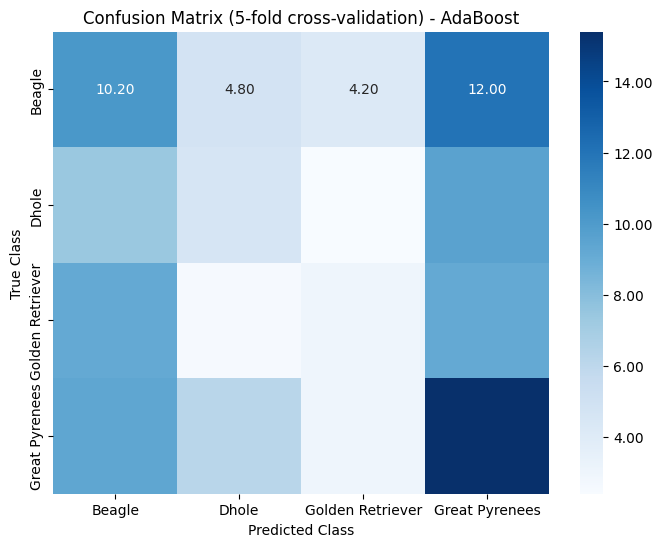

Adaboost Accuracy: 0.29328621908127206


In [21]:
# Adaboost: AdaBoostClassifier with default parameters.
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Combine all training data and create corresponding labels
all_train_data = np.vstack((class1_train, class2_train, class3_train, class4_train))
all_train_labels = np.concatenate(([1] * len(class1_train), [2] * len(class2_train), [3] * len(class3_train), [4] * len(class4_train)))

# Define the AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier()

# Perform stratified 5-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store confusion matrices for each fold
confusion_matrices = []

for train_index, val_index in skf.split(all_train_data, all_train_labels):
    X_train, X_val = all_train_data[train_index], all_train_data[val_index]
    y_train, y_val = all_train_labels[train_index], all_train_labels[val_index]

    # Create and train AdaBoost classifier
    adaboost_classifier.fit(X_train, y_train)

    # Make predictions on the validation set
    y_val_pred = adaboost_classifier.predict(X_val)

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_val, y_val_pred, labels=[1, 2, 3, 4])
    confusion_matrices.append(cm)

# Calculate the mean confusion matrix across folds
mean_confusion_matrix = np.mean(confusion_matrices, axis=0)

# Modify the labels for the confusion matrix
class_labels = ["Beagle", "Dhole", "Golden Retriever", "Great Pyrenees"]

# Print the mean confusion matrix with labeled axes
print("Confusion Matrix:")
print(mean_confusion_matrix)

# Plot the mean confusion matrix with labeled axes
plt.figure(figsize=(8, 6))
sns.heatmap(mean_confusion_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels, cbar_kws={'format': '%.2f'})
plt.title("Confusion Matrix (5-fold cross-validation) - AdaBoost")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculating the accuracy to determine the better method
adaboost_matrix = np.array(mean_confusion_matrix)

adaboost_accuracy = np.trace(adaboost_matrix) / np.sum(adaboost_matrix)
print(f"Adaboost Accuracy: {adaboost_accuracy}")


In [ ]:
# Based on the confusion matrices (the cross validation results), which do you think is more correct method? Why?
''' Ans: AdaBoost Classifier is more better method. The reason is that it is more accurate (2.9) than Naive Bayes (2.5) 
and Neural network(2.6) based on the accuracies of the methods calculated '''

In [23]:
# Based on the mean validation accuracies (from the 5-fold cross-validation) for the three methods.
# Which is the best method?
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
import numpy as np

# Combine all training data and create corresponding labels
all_train_data = np.vstack((class1_train, class2_train, class3_train, class4_train))
all_train_labels = np.concatenate(([1] * len(class1_train), [2] * len(class2_train), [3] * len(class3_train), [4] * len(class4_train)))

# Gaussian Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_cv_scores = cross_val_score(nb_classifier, all_train_data, all_train_labels, cv=5, scoring='accuracy')
nb_mean_accuracy = np.mean(nb_cv_scores)

# AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier()
adaboost_cv_scores = cross_val_score(adaboost_classifier, all_train_data, all_train_labels, cv=5, scoring='accuracy')
adaboost_mean_accuracy = np.mean(adaboost_cv_scores)

# Neural Network Classifier with 3 hidden layers
mlp_classifier = MLPClassifier(hidden_layer_sizes=(10, 10, 10), random_state=42, max_iter=1000)
mlp_cv_scores = cross_val_score(mlp_classifier, all_train_data, all_train_labels, cv=5, scoring='accuracy')
mlp_mean_accuracy = np.mean(mlp_cv_scores)

# Determine the best method based on mean validation accuracies
best_method = max({
    'Gaussian Naive Bayes': nb_mean_accuracy,
    'AdaBoost': adaboost_mean_accuracy,
    'Neural Network': mlp_mean_accuracy
}.items(), key=lambda x: x[1])

print(f"Best Method based on Mean Validation Accuracy is {best_method[0]} with Mean Accuracy: {best_method[1]:.4f}")


Best Method based on Mean Validation Accuracy is AdaBoost with Mean Accuracy: 0.2614


In [14]:
# Compute the accuracies for the three methods on the test set. Which is the best method?
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import numpy as np

# Combine all training data and create corresponding labels
all_train_data = np.vstack((class1_train, class2_train, class3_train, class4_train))
all_train_labels = np.concatenate(([1] * len(class1_train), [2] * len(class2_train), [3] * len(class3_train), [4] * len(class4_train)))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    all_train_data, all_train_labels, test_size=0.2, random_state=42, stratify=all_train_labels
)

# Gaussian Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_accuracy = accuracy_score(y_test, nb_classifier.predict(X_test))
print(f'Accuracy - Gaussian Naive Bayes: {nb_accuracy:.4f}')

# AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier()
adaboost_classifier.fit(X_train, y_train)
adaboost_accuracy = accuracy_score(y_test, adaboost_classifier.predict(X_test))
print(f'Accuracy - AdaBoost: {adaboost_accuracy:.4f}')

# Neural Network Classifier with 3 hidden layers
mlp_classifier = MLPClassifier(hidden_layer_sizes=(10, 10, 10), random_state=42, max_iter=1000)
mlp_classifier.fit(X_train, y_train)
mlp_accuracy = accuracy_score(y_test, mlp_classifier.predict(X_test))
print(f'Accuracy - Neural Network: {mlp_accuracy:.4f}')

# Determine the best method based on accuracies
best_method = max({
    'Gaussian Naive Bayes': nb_accuracy,
    'AdaBoost': adaboost_accuracy,
    'Neural Network': mlp_accuracy
}.items(), key=lambda x: x[1])

print(f"\nBest Method: {best_method[0]} with Accuracy: {best_method[1]:.4f}")


Accuracy - Gaussian Naive Bayes: 0.2632
Accuracy - AdaBoost: 0.3158
Accuracy - Neural Network: 0.2632

Best Method: AdaBoost with Accuracy: 0.3158


In [15]:
# Compute the F-measure for the three methods on the test set. Which is the best method?
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import numpy as np

# Combine all training data and create corresponding labels
all_train_data = np.vstack((class1_train, class2_train, class3_train, class4_train))
all_train_labels = np.concatenate(([1] * len(class1_train), [2] * len(class2_train), [3] * len(class3_train), [4] * len(class4_train)))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    all_train_data, all_train_labels, test_size=0.2, random_state=42, stratify=all_train_labels
)

# Gaussian Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_f1 = f1_score(y_test, nb_classifier.predict(X_test), average='weighted')
print(f'F-measure - Gaussian Naive Bayes: {nb_f1:.4f}')

# AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier()
adaboost_classifier.fit(X_train, y_train)
adaboost_f1 = f1_score(y_test, adaboost_classifier.predict(X_test), average='weighted')
print(f'F-measure - AdaBoost: {adaboost_f1:.4f}')

# Neural Network Classifier with 3 hidden layers
mlp_classifier = MLPClassifier(hidden_layer_sizes=(10, 10, 10), random_state=42, max_iter=1000)
mlp_classifier.fit(X_train, y_train)
mlp_f1 = f1_score(y_test, mlp_classifier.predict(X_test), average='weighted')
print(f'F-measure - Neural Network: {mlp_f1:.4f}')

# Determine the best method based on F-measures
best_method = max({
    'Gaussian Naive Bayes': nb_f1,
    'AdaBoost': adaboost_f1,
    'Neural Network': mlp_f1
}.items(), key=lambda x: x[1])

print(f"\nBest Method: {best_method[0]} with F-measure: {best_method[1]:.4f}")


F-measure - Gaussian Naive Bayes: 0.2459
F-measure - AdaBoost: 0.3108
F-measure - Neural Network: 0.2639

Best Method: AdaBoost with F-measure: 0.3108
